## Titanic Competition

#### Firstly let's put paths

In [432]:
train_data_path = "train.csv"
test_data_path = "test.csv"

#### Second step is needed libraries

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [434]:
def wrangle(train_data_path):
    # Importing the data
    train = pd.read_csv(train_data_path)
    # Getting some look for values
    print(train.head())
    # Getting important notes of it
    print(train.info())
    # Does there is something weird in values?
    print(train.describe())
    # Let's retrieve Males and Females
    male = train[train.Sex=='male']
    female = train[train.Sex=='female']
    def categorize_age(age):
        if age < 18:
            return "Child"
        elif age < 65:
            return "Adult"
        else:
            return "Old"
    train['Age_Category'] = train['Age'].apply(categorize_age)\
    #Creating new family_size column
    train['Family_Size']=train['SibSp']+train['Parch']
    train['Alone'] = np.where(train['Family_Size'] == 0, 1, 0)
    print("#################### Data has been checked ####################")
    print(train.head())
    return train


In [435]:
train = wrangle(train_data_path)
test = wrangle(test_data_path)
train.head()
male=male = train[train.Sex=='male']
female=female = train[train.Sex=='female']

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

#### Some EDA

In [436]:
# What's percent of women and men have stayed alive?
percent_of_alive_females = (female.groupby("Sex")["Survived"].mean()).values[0]
percent_of_alive_males = (male.groupby("Sex")["Survived"].mean()).values[0]
print(f"Percent of Alive females were about {percent_of_alive_females:.2%}",
      f"while Percent of Alive males were about {percent_of_alive_males:.2%}",sep="\n")
print("Men have suffered sadly")

Percent of Alive females were about 74.20%
while Percent of Alive males were about 18.89%
Men have suffered sadly


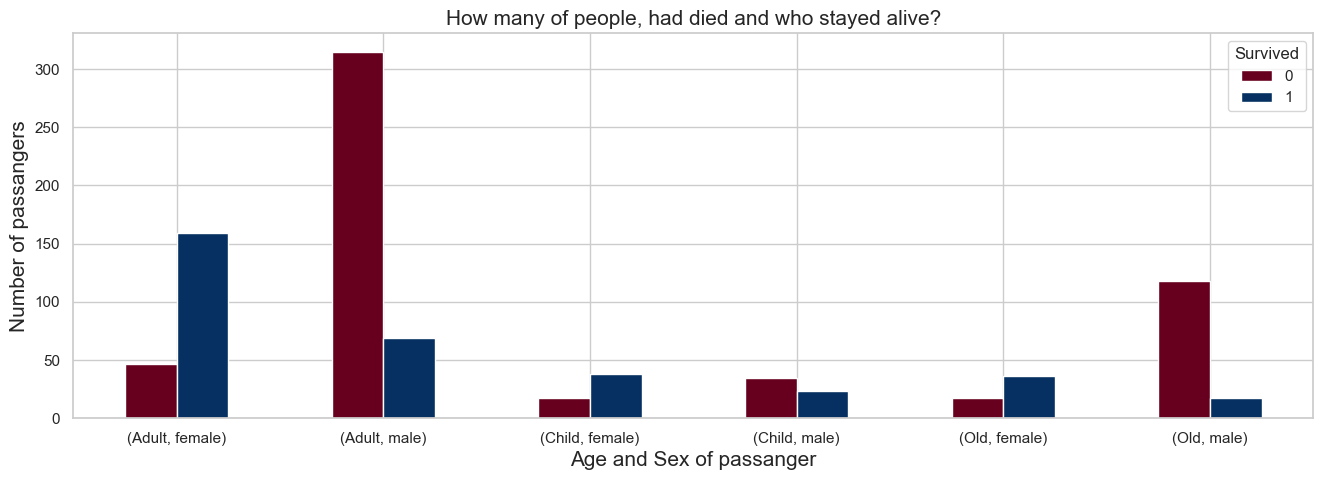

In [437]:
# Which type of ages has more died ? 
age_category_counts = train.groupby(['Age_Category', 'Sex'])['Survived'].value_counts().unstack()
legend = ('alive','dead')
age_category_counts.plot(kind='bar',rot=360,legend=legend,figsize=(16,5),colormap='RdBu')
plt.ylabel("Number of passangers",fontsize=15)
plt.xlabel("Age and Sex of passanger",fontsize=15)
plt.title("How many of people, had died and who stayed alive?",fontsize=15)
plt.show()

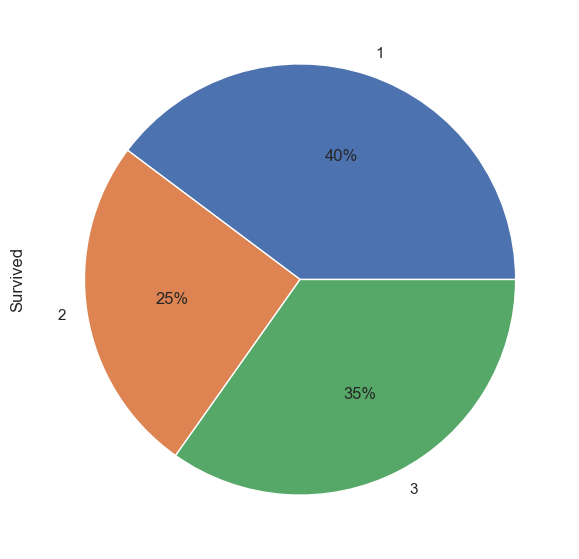

In [438]:
# Which Class Has Survived ? 
Class_Survived = train.groupby('Pclass')['Survived'].sum()
Class_Survived.plot(kind='pie',autopct='%.0f%%',figsize=(7,7))
plt.show()

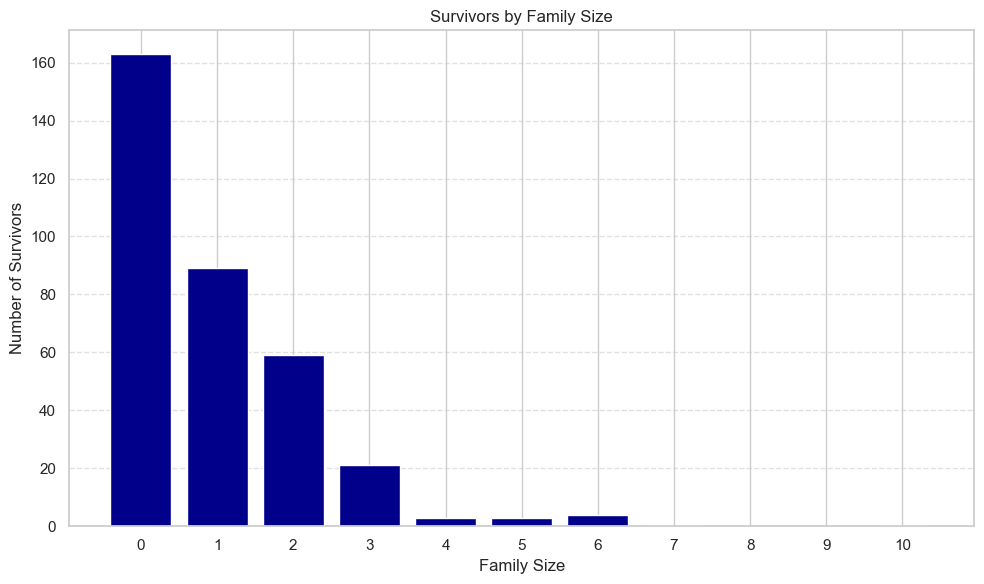

In [439]:
Class_Survived = train.groupby('Family_Size')['Survived'].sum()
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(Class_Survived.index, Class_Survived.values, color='DarkBlue')  # Set color and transparency
# Adding labels and title
plt.xlabel('Family Size')
plt.xticks(ticks=range(0,11))
plt.ylabel('Number of Survivors')
plt.title('Survivors by Family Size')
# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

<Axes: >

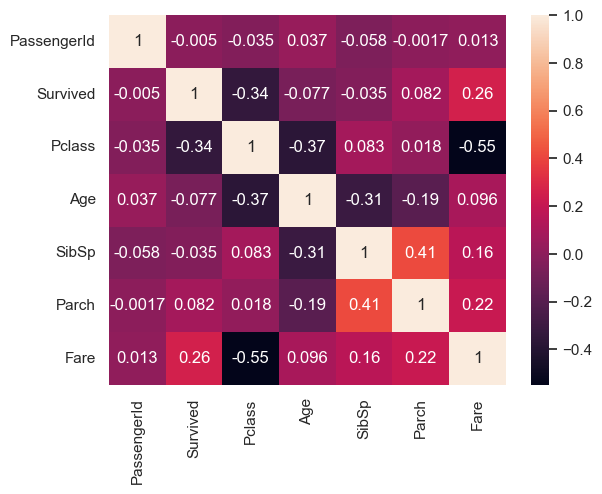

In [440]:
numeric_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Filter the data using the numeric column names
sns.heatmap(train[numeric_columns].corr(),annot=True)

#### Building Model

In [441]:
features = ["Pclass", "Sex", "SibSp", "Parch",'Alone','Family_Size']
X_train = train[features]
X_test  = test[features]
y_train = train["Survived"]
# Define the categorical columns
X_train = pd.get_dummies(X_train[features],dtype=int)
X_test = pd.get_dummies(X_test[features],dtype=int)

print(X_train.head(),X_test.head(),X_train.shape,X_test.shape,y_train.shape,sep='\n')

   Pclass  SibSp  Parch  Alone  Family_Size  Sex_female  Sex_male
0       3      1      0      0            1           0         1
1       1      1      0      0            1           1         0
2       3      0      0      1            0           1         0
3       1      1      0      0            1           1         0
4       3      0      0      1            0           0         1
   Pclass  SibSp  Parch  Alone  Family_Size  Sex_female  Sex_male
0       3      0      0      1            0           0         1
1       3      1      0      0            1           1         0
2       2      0      0      1            0           0         1
3       3      0      0      1            0           0         1
4       3      1      1      0            2           1         0
(891, 7)
(418, 7)
(891,)


In [442]:
# Define your RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
# Define the hyperparameters you want to tune and their respective values to try
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5,10,15],  # Maximum depth of the trees
}
# Create GridSearchCV with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters 
print("Best Hyperparameters:", grid_search.best_params_)
# Get the best estimator (model) 
best_rf = grid_search.best_estimator_
# Print the Score of model
print(f'The score was = {grid_search.score(X_train,y_train):.2%}')

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 200}
The score was = 81.48%


In [443]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': grid_search.predict(X_test)})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
